In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [5]:
images_df = pd.read_csv('/Users/jinjishen/Desktop/fashion-dataset/images.csv')
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [6]:
styles_df = pd.read_csv('/Users/jinjishen/Desktop/fashion-dataset/styles.csv', on_bad_lines='skip')
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [7]:
print(images_df.shape)
print(styles_df.shape)

(44446, 2)
(44424, 10)


In [13]:
images_df['id'] = images_df['filename'].apply(lambda x: int(x.split('.')[0]))
merged_df = pd.merge(images_df,styles_df,on='id')
merged_df['path'] = merged_df['filename'].apply(lambda x: '/Users/jinjishen/Desktop/fashion-dataset/images/'+x)
merged_df.head()

,filename,link,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,path
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,/Users/jinjishen/Desktop/fashion-dataset/image...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,/Users/jinjishen/Desktop/fashion-dataset/image...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,/Users/jinjishen/Desktop/fashion-dataset/image...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,/Users/jinjishen/Desktop/fashion-dataset/image...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,/Users/jinjishen/Desktop/fashion-dataset/image...


In [14]:
merged_df.shape

(44424, 13)

To address computational constraints and dataset size, we have decided to use a 10% sampling strategy for our analysis. We will select 10% of the data from each subcategory, ensuring the overall distribution remains consistent while significantly reducing the data volume. This approach balances computational efficiency with sufficient data for meaningful insights, allowing us to train, validate, and recommend models effectively without overwhelming our resources.

In [15]:
# Sample 10% of data from each masterCategory
sampled_df = merged_df.groupby('masterCategory', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Check the sampled data
print(sampled_df.shape)
print(sampled_df['masterCategory'].value_counts())

(4441, 13)
Apparel           2140
Accessories       1127
Footwear           922
Personal Care      240
Free Items          10
Sporting Goods       2
Name: masterCategory, dtype: int64


In [16]:
sampled_df.to_csv('/Users/jinjishen/Desktop/fashion-dataset/sampled_df.csv')

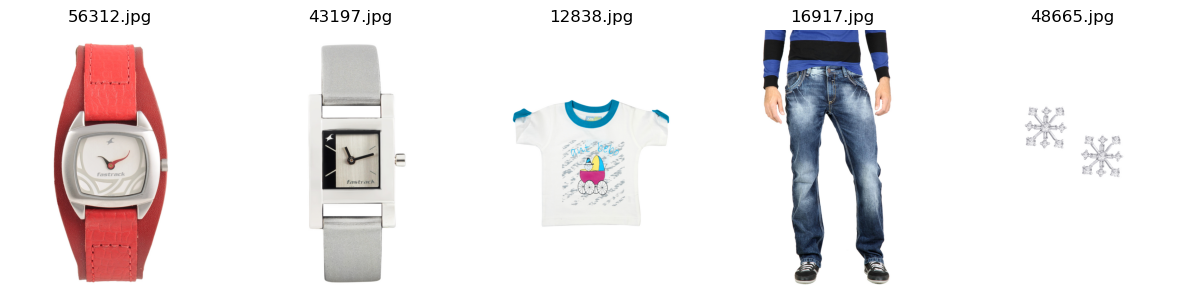

In [22]:
def show_random_images(df, num_images=5, image_column='path'):
    """
    Displays a random selection of images from the dataset.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing image file paths.
    num_images (int): The number of random images to display. Default is 5.
    image_column (str): The column name in the DataFrame that contains the image file paths.
    """
    # Randomly sample the DataFrame
    sampled_df = df.sample(n=num_images)
    
    # Set up a grid to display images
    plt.figure(figsize=(15, 5))
    
    for i, img_path in enumerate(sampled_df[image_column]):
        if os.path.exists(img_path):  # Ensure the image path exists
            img = Image.open(img_path)
            
            # Plot each image in a subplot
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(img_path.split('/')[-1])
            plt.axis('off')  # Hide the axis
        else:
            print(f"Image not found at: {img_path}")
    
    plt.show()

show_random_images(sampled_df, num_images=5, image_column='path')